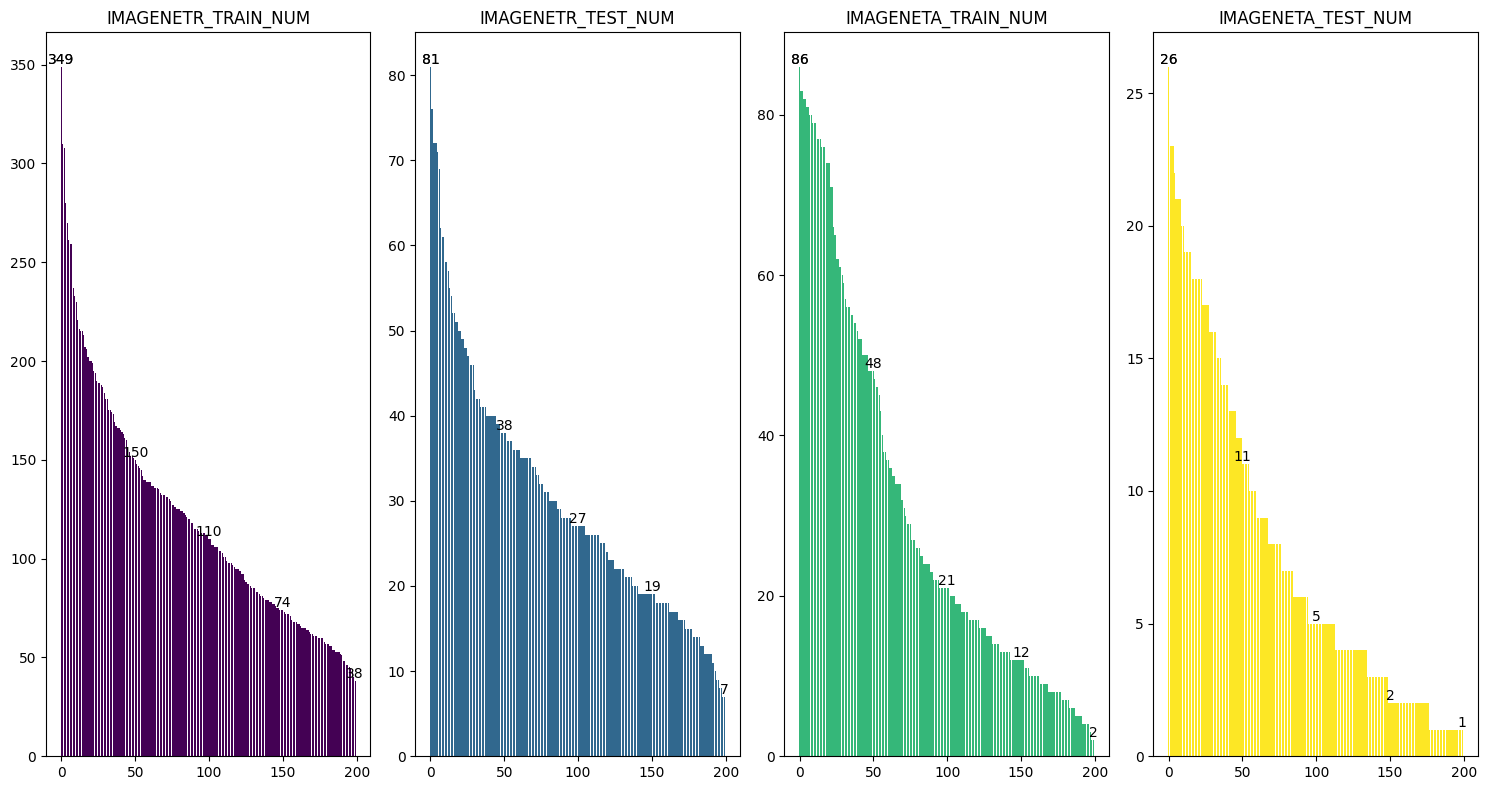

In [51]:
import torch  
import matplotlib.pyplot as plt  
  
# 假设你的.pth文件保存的是一维张量  
def load_data_from_pth(file_path):  
    # 加载.pth文件中的数据  
    data = torch.load(file_path)  
    # 将数据从大到小排序  
    sorted_data = sorted(data, reverse=True)  
    return sorted_data 
  
# 假设你有四个.pth文件的路径 
pth_files = ['imagenetr_train_num.pth', 'imagenetr_test_num.pth', 'imageneta_train_num.pth','imageneta_test_num.pth'] 
  
# 加载数据
data_list = []  
for file_path in pth_files:  
    sorted_data= load_data_from_pth('../res/' + file_path)  
    data_list.append(sorted_data)  
  
# 创建一个颜色映射  
cmap = plt.get_cmap('viridis')  
colors = [cmap(i / (len(pth_files) - 1)) for i in range(len(pth_files))]  # 为每个数据集生成不同的颜色  
  
# 创建一个图形和轴对象  
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 8))  
ax_index = 0
# 绘制每个子图  
for ax, data, color in zip(axs, data_list, colors):  
    ax.bar(range(len(data)), data, color=color)  
      
    # 设置x轴和y轴的标签  
      
    # 设置图的标题  
    ax.set_title(pth_files[ax_index].split('.')[0].upper())
    ax_index += 1
      
    # 标记头尾以及每50个条形图的数量  
    ax.text(0, data[0] , str(data[0]), ha='center', va='bottom')  # 头部  
    ax.text(199, data[-1] , str(data[-1]), ha='center', va='bottom')  # 尾部  
    for i in range(0, len(data), 50):  
        ax.text(i, data[i] , str(data[i]), ha='center', va='bottom')  # 每50个  
         
  
# 调整子图之间的间距  
plt.tight_layout()  
  
# 显示图形  
plt.show()

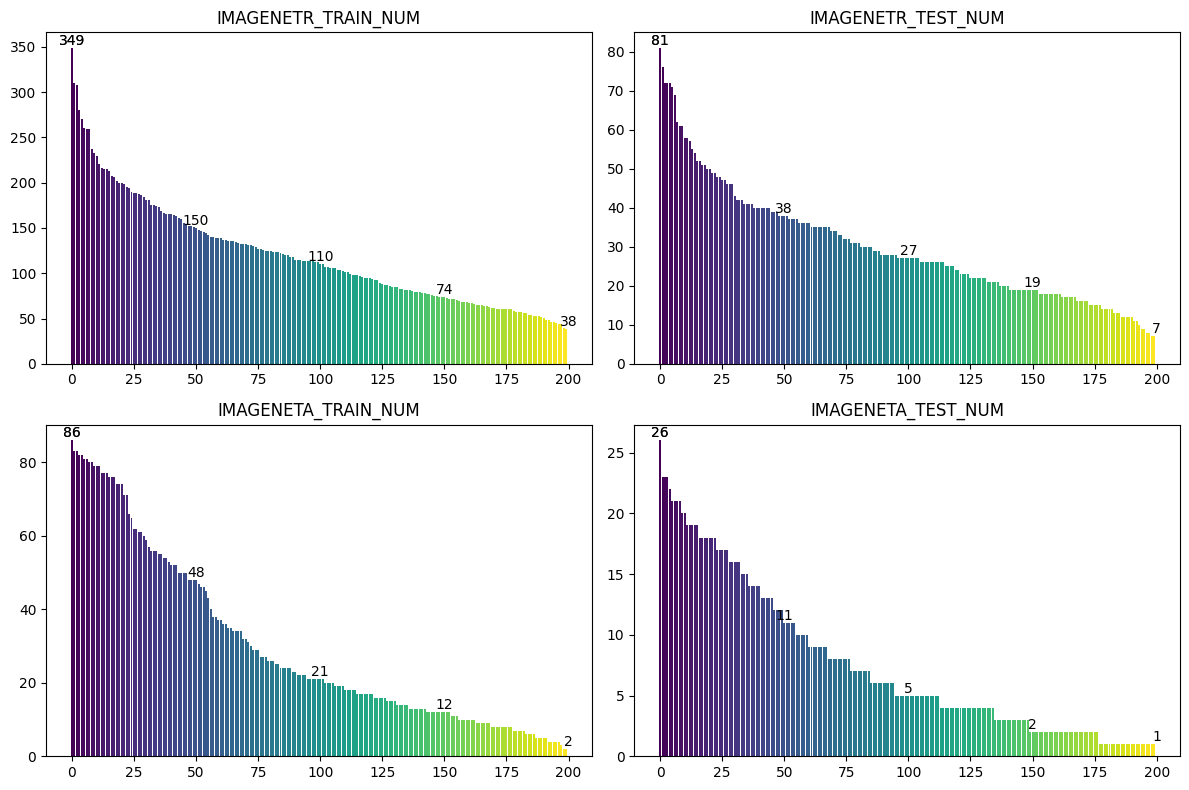

In [48]:
import torch  
import matplotlib.pyplot as plt  
  
# 假设你的.pth文件保存的是一维张量  
def load_data_from_pth(file_path):  
    # 加载.pth文件中的数据  
    data = torch.load(file_path)  
    # 将数据从大到小排序  
    sorted_data = sorted(data, reverse=True)  
    return sorted_data 
  
# 假设你有四个.pth文件的路径 
pth_files = ['imagenetr_train_num.pth', 'imagenetr_test_num.pth', 'imageneta_train_num.pth','imageneta_test_num.pth'] 
  
# 加载数据
data_list = []  
for file_path in pth_files:  
    sorted_data= load_data_from_pth('../res/' + file_path)  
    data_list.append(sorted_data)  
  
# 创建一个颜色映射  
# cmap = plt.get_cmap('viridis')  
# colors = [cmap(i / (len(pth_files) - 1)) for i in range(len(pth_files))]  # 为每个数据集生成不同的颜色  
  
# 初始化图形和子图  
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # 2行2列的子图  
axs = axs.flatten()  # 将子图数组展平为一维数组
 
# 绘制柱状图  
for i, data in enumerate(data_list): 
    sorted_data = data_list[i] 
    # 创建一个颜色映射  
    cmap = plt.get_cmap('viridis')  
    colors = cmap(np.linspace(0, 1, len(sorted_data)))  
      
    # 绘制子柱状图  
    axs[i].bar(range(len(sorted_data)), sorted_data, color=colors)  
      
    # 设置图的标题  
    axs[i].set_title(pth_files[i].split('.')[0].upper())  
      
    # 标记头尾以及每50个条形图的数量  
    axs[i].text(0, sorted_data[0] , str(sorted_data[0]), ha='center', va='bottom')  # 头部  
    axs[i].text(len(sorted_data) , sorted_data[-1] , str(sorted_data[-1]), ha='center', va='bottom')  # 尾部  
    for j in range(0, len(sorted_data), 50):  
        if j < len(sorted_data):  
            axs[i].text(j, sorted_data[j] , str(sorted_data[j]), ha='center', va='bottom')  # 每50个    
         
  
# 调整子图之间的间距  
plt.tight_layout()  
  
# 显示图形  
plt.show()